In [1]:
import numpy as np
import scipy
import random as random
from scipy import special
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
plt.style.use('seaborn-pastel')
import time

-0.0624687395788881


<IPython.core.display.Javascript object>


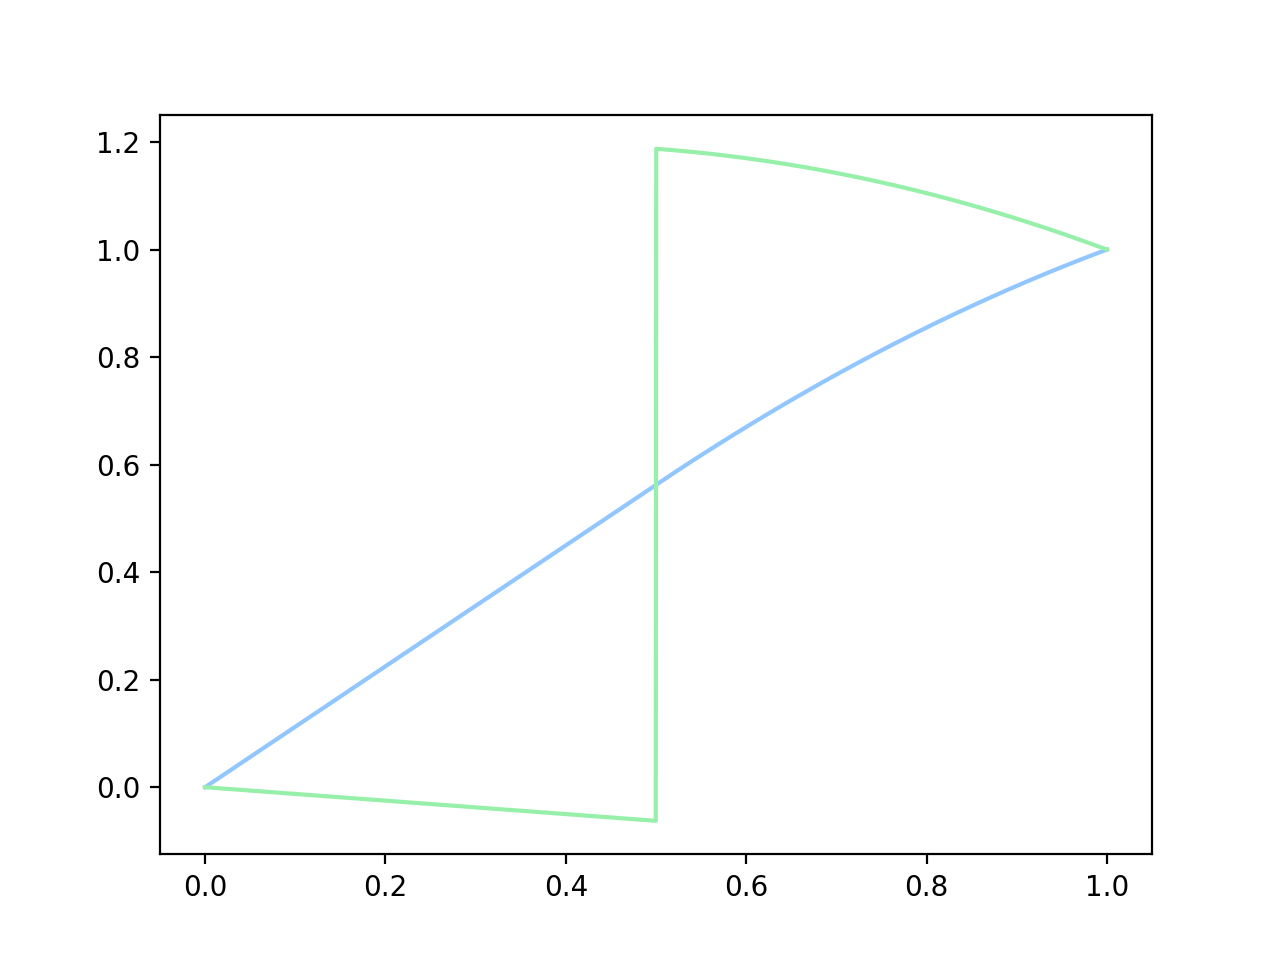

In [5]:
#общая задача
L_x = 1
m = 2000
h = L_x / (m - 1)
x = np.linspace(0, L_x, m)
T_0 = 0
T_1 = 1
f_1 = 0
f_2 = 0
k_1 = 1
k_2 = 1
u = np.zeros(m)
u_anal = np.zeros(m)
f = np.zeros(m)
k = np.zeros(m)
u[0] = T_0
u[m-1] = T_1
#print(x)
for i in range(len(x)):
    if x[i] < 0.5:
        f[i] = f_1
        k[i] = k_1
    if x[i] >= 0.5:
        f[i] = f_2
        k[i] = k_2
#print(f / k)
A = np.zeros([m, m])
F = np.zeros(m)
a = np.zeros([2,2])
a[0][0] = a[1][1] = 1
a[0][1] = a[1][0] = -1
#print(a)
#Заоплняем матрицы A и F
for k_ in range(m-1):
    for i in range(2):
        #if i == 0:
            #F[k_+i] = F[k_+i] + h/6 * (2 * f[k_ + 0] + f[k_ + 0 + 1])
       # else:
           # F[k_+i] = F[k_+i] + h/6 * (f[k_ + 1] + 2 * f[k_ + 2])
        for j in range(2):
            coeff = (k[k_] + k[k_+1])/(2 * h)
            A[k_+i][k_+j] = A[k_ + i][k_ + j] + coeff * a[i][j]
for k_ in range(m-1):
    for i in range(2):
        if i == 0:
            F[k_+i] +=  h/6 * (2*f[k_] +  f[k_ + 1])
        else:
            F[k_+i] +=  h/6 * (f[k_] + 2 * f[k_ + 1])


#print(F)
###граничные условия
A[0][0], A[0][1] = 1, 0
F[0] = T_0
A[m-1][m-2], A[m-1][m-1] = 0, 1
F[m-1] = T_1
####
#print(A)
#print(F)
alph = np.zeros(m)
beta = np.zeros(m)
alph[1] = - A[0][1]/A[0][0]
beta[1] = F[0] / A[0][0]
for i in range(1,m-1):
    alph[i+1] = - A[i][i+1]/(A[i][i] + A[i][i-1]*alph[i]) 
    beta[i+1] = (F[i] - A[i][i-1]*beta[i]) / (A[i][i] + A[i][i-1]*alph[i])
for i in range(m-2,0,-1):
    u[i] = alph[i+1]*u[i+1] + beta[i+1]
print(min(u - (-(f/k)*(x**2/2)+ (T_1-T_0+f/(2*k))*x +T_0)))
###точное решение
C_2 = T_0
C_3 = (2 * (T_1 - T_0) + 0.25 * (-3 * f_2 / k_2 - f_1 / k_1) + 0.5 * (f_1 - f_2)) / (k_2 / k_1 + 1)
C_1 = (f_1/2 - f_2 / 2 + k_2 * C_3)/ k_1
C_4 = T_1 + f_2 / (2*k_2) - C_3
for i in range(len(x)):
    if x[i] < 0.5:
        u_anal[i] = - f_1 / (2 * k_1) * x[i]**2 + C_1 * x[i] + C_2
    else:
        u_anal[i] = - f_2 / (2 * k_2) * x[i]**2 + C_3 * x[i] + C_4
####
#print(np.linalg.solve(A, F))
plt.plot(x, np.linalg.solve(A, F))
plt.plot(x, u_anal)
plt.show()

In [3]:
#задача В
L_x = 1
m = 1001
h = L_x / ((m-1)/2)
x = np.linspace(0, L_x, m)
T_0 = 0
T_1 = 0
u = np.zeros(m)
f = np.zeros(m)
u[0] = T_0
u[m-1] = T_1
#print(x)
for i in range(len(x)):
    f[i] = (96 * 8*(8*x[i]-4)**2 - 32**2 * (8*x[i] - 4)**6) * np.exp(-(8*x[i] - 4)**4)

#print(max(f))
A = np.zeros([m, m])
a = np.zeros([3,3])
a[0][1] = a[1][0] = a[1][2] = a[2][1] = -8
a[0][0] = a[2][2] = 7
a[1][1] = 16
a[0][2] = a[2][0] = 1
F = np.zeros(m)
for k in range(int((m-1)/ 2)):
    for i in range(3):
        for j in range(3):
            A[2*k - 2 +i][2*k -2+ j] +=  a[i][j] / (3 * h)
for k in range(int((m-1)/ 2)):
    for i in range(3):
        if i == 0:
            F[2*k - 2 + i] += h / 30 * (4 * f[2*k-2] + 2 * f[2*k-2 + 1] - f[2*k - 2 + 2])
        if i == 1:
            F[2*k - 2 + i] += h / 30 * (2 * f[2*k-2] + 16 * f[2*k-2 + 1] + 2 * f[2*k - 2 + 2])
        if i == 2:
            F[2*k - 2 + i] += h / 30 * (-1 * f[2*k-2] + 2 * f[2*k-2 + 1] + 4 * f[2*k - 2 + 2])
###граничные условия
A[0][0], A[0][1] = 1, 0
F[0] = T_0
A[m-1][m-2], A[m-1][m-1] = 0, 1
F[m-1] = T_1
####
k1 = max(abs(np.linalg.solve(A,F)- np.exp(-(8*x - 4)**4)))
print(k1)
#plt.plot(x, np.linalg.solve(A, F))
plt.plot(x, np.exp(-(8*x - 4)**4))
plt.show()

1.3434464263273327e-08


8.137338580738174e-10


<IPython.core.display.Javascript object>


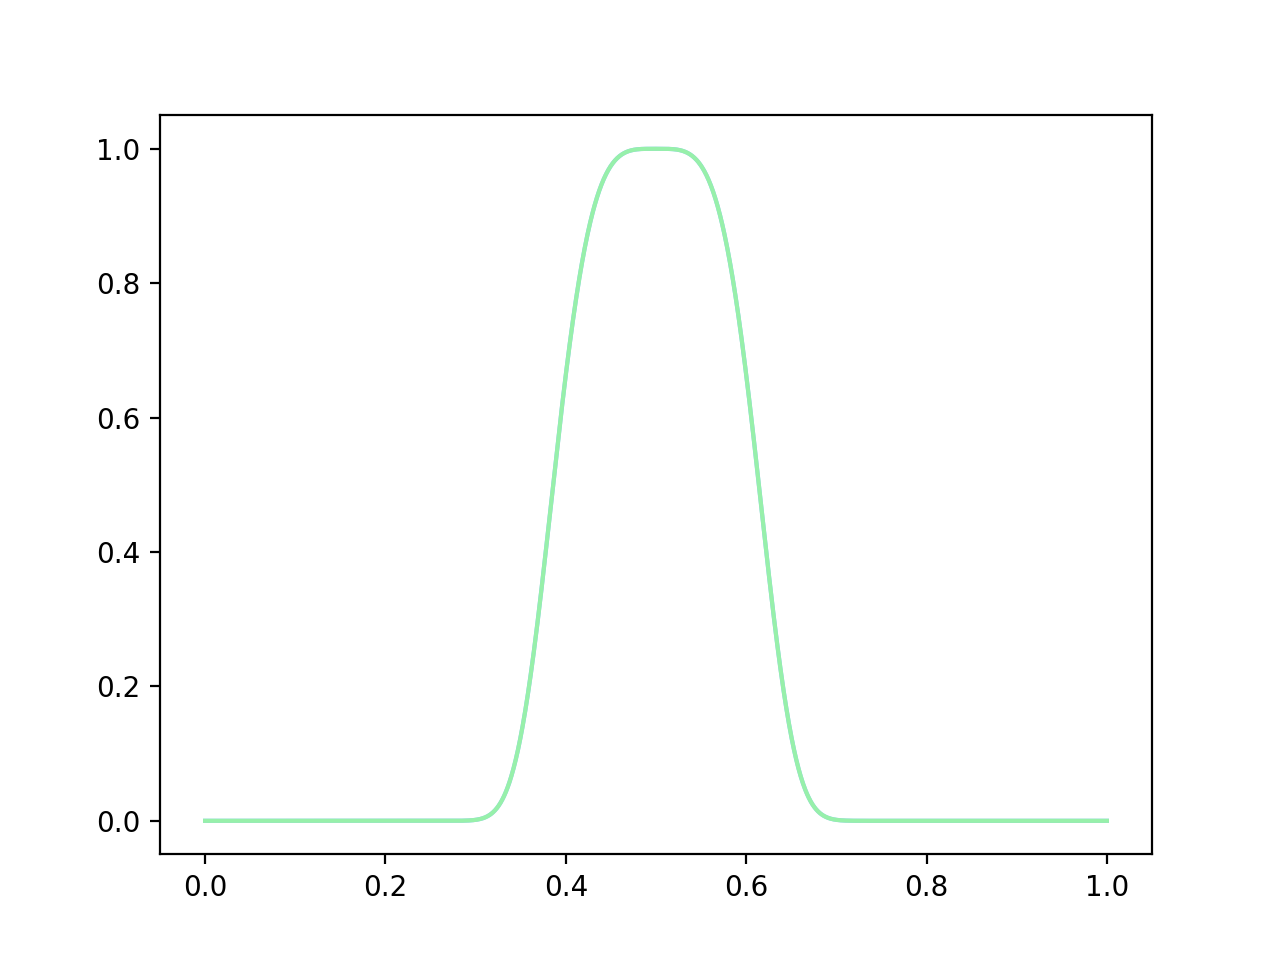

In [17]:
L_x = 1
m = 2001
h = L_x / ((m-1)/2)
x = np.linspace(0, L_x, m)
T_0 = 0
T_1 = 0
u = np.zeros(m)
f = np.zeros(m)
u[0] = T_0
u[m-1] = T_1
#print(x)
for i in range(len(x)):
    f[i] = (96 * 8*(8*x[i]-4)**2 - 32**2 * (8*x[i] - 4)**6) * np.exp(-(8*x[i] - 4)**4)

#print(max(f))
A = np.zeros([m, m])
a = np.zeros([3,3])
a[0][1] = a[1][0] = a[1][2] = a[2][1] = -8
a[0][0] = a[2][2] = 7
a[1][1] = 16
a[0][2] = a[2][0] = 1
F = np.zeros(m)
for k in range(int((m-1)/ 2)):
    for i in range(3):
        for j in range(3):
            A[2*k - 2 +i][2*k -2+ j] +=  a[i][j] / (3 * h)
for k in range(int((m-1)/ 2)):
    for i in range(3):
        if i == 0:
            F[2*k - 2 + i] += h / 30 * (4 * f[2*k-2] + 2 * f[2*k-2 + 1] - f[2*k - 2 + 2])
        if i == 1:
            F[2*k - 2 + i] += h / 30 * (2 * f[2*k-2] + 16 * f[2*k-2 + 1] + 2 * f[2*k - 2 + 2])
        if i == 2:
            F[2*k - 2 + i] += h / 30 * (-1 * f[2*k-2] + 2 * f[2*k-2 + 1] + 4 * f[2*k - 2 + 2])
###граничные условия
A[0][0], A[0][1] = 1, 0
F[0] = T_0
A[m-1][m-2], A[m-1][m-1] = 0, 1
F[m-1] = T_1
####
k2 = max(abs(np.linalg.solve(A,F) - np.exp(-(8*x - 4)**4)))
print(k2)
plt.plot(x, np.linalg.solve(A, F))
plt.plot(x, np.exp(-(8*x - 4)**4))
plt.show()

In [21]:
p = np.log(k1 / k2) / np.log(2)
print(p)

4.045237960765142


In [5]:
##тест для линейной штуки
def test(m, f_1, f_2, k_1, k_2, T_0, T_1):
    L_x = 1
    h = L_x / (m - 1)
    x = np.linspace(0, L_x, m)
    u = np.zeros(m)
    u_anal = np.zeros(m)
    f = np.zeros(m)
    k = np.zeros(m)
    u[0] = T_0
    u[m-1] = T_1
    for i in range(len(x)):
        if x[i] < 0.5:
            f[i] = f_1
            k[i] = k_1
        if x[i] >= 0.5:
            f[i] = f_2
            k[i] = k_2
    A = np.zeros([m, m])
    F = np.zeros(m)
    a = np.zeros([2,2])
    a[0][0] = a[1][1] = 1
    a[0][1] = a[1][0] = -1
    #Заоплняем матрицы A и F
    for k_ in range(m-1):
        for i in range(2):
            for j in range(2):
                coeff = (k[k_] + k[k_+1])/(2 * h)
                A[k_+i][k_+j] = A[k_ + i][k_ + j] + coeff * a[i][j]
    for k_ in range(m-1):
        for i in range(2):
            if i == 0:
                F[k_+i] +=  h/6 * (2*f[k_] +  f[k_ + 1])
            else:
                F[k_+i] +=  h/6 * (f[k_] + 2 * f[k_ + 1])


    #print(F)
    ###граничные условия
    A[0][0], A[0][1] = 1, 0
    F[0] = T_0
    A[m-1][m-2], A[m-1][m-1] = 0, 1
    F[m-1] = T_1
    ####
    #print(A)
    #print(F)
    alph = np.zeros(m)
    beta = np.zeros(m)
    alph[1] = - A[0][1]/A[0][0]
    beta[1] = F[0] / A[0][0]
    for i in range(1,m-1):
        alph[i+1] = - A[i][i+1]/(A[i][i] + A[i][i-1]*alph[i]) 
        beta[i+1] = (F[i] - A[i][i-1]*beta[i]) / (A[i][i] + A[i][i-1]*alph[i])
    for i in range(m-2,0,-1):
        u[i] = alph[i+1]*u[i+1] + beta[i+1]
    ###точное решение
    C_2 = T_0
    C_3 = (2 * (T_1 - T_0) + 0.25 * (-3 * f_2 / k_2 - f_1 / k_1) + 0.5 * (f_1 - f_2)) / (k_2 / k_1 + 1)
    C_1 = (f_1/2 - f_2 / 2 + k_2 * C_3)/ k_1
    C_4 = T_1 + f_2 / (2*k_2) - C_3
    for i in range(len(x)):
        if x[i] < 0.5:
            u_anal[i] = - f_1 / (2 * k_1) * x[i]**2 + C_1 * x[i] + C_2
        else:
            u_anal[i] = - f_2 / (2 * k_2) * x[i]**2 + C_3 * x[i] + C_4
    ####
    return max(abs(u - u_anal))

In [14]:
test(100, 0, 0, 10, 20, 2, 3)

0.0007414973707189354

In [13]:
i = 0
vec = np.zeros(100)
while(i<100):
    f1 = random.random()*100
    f2 = random.random()*100
    k1 = random.random()*100
    k2 = random.random()*100
    norm_1 = test(50, 0, 0 , 10, 20, 2, 3)
    norm_2 = test(100,0, 0, 10, 20, 2, 3)
    vec[i] = np.log(norm_1 / norm_2) / np.log(2)
    #print(f1, f2, k1, k2)
    i +=1
print(vec)

[1.00120124 1.00120124 1.00120124 1.00120124 1.00120124 1.00120124
 1.00120124 1.00120124 1.00120124 1.00120124 1.00120124 1.00120124
 1.00120124 1.00120124 1.00120124 1.00120124 1.00120124 1.00120124
 1.00120124 1.00120124 1.00120124 1.00120124 1.00120124 1.00120124
 1.00120124 1.00120124 1.00120124 1.00120124 1.00120124 1.00120124
 1.00120124 1.00120124 1.00120124 1.00120124 1.00120124 1.00120124
 1.00120124 1.00120124 1.00120124 1.00120124 1.00120124 1.00120124
 1.00120124 1.00120124 1.00120124 1.00120124 1.00120124 1.00120124
 1.00120124 1.00120124 1.00120124 1.00120124 1.00120124 1.00120124
 1.00120124 1.00120124 1.00120124 1.00120124 1.00120124 1.00120124
 1.00120124 1.00120124 1.00120124 1.00120124 1.00120124 1.00120124
 1.00120124 1.00120124 1.00120124 1.00120124 1.00120124 1.00120124
 1.00120124 1.00120124 1.00120124 1.00120124 1.00120124 1.00120124
 1.00120124 1.00120124 1.00120124 1.00120124 1.00120124 1.00120124
 1.00120124 1.00120124 1.00120124 1.00120124 1.00120124 1.0012